# Titanic - Machine Learning From Disaster


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Seaborn theme
sns.set_theme(palette="mako")


## EDA


In [3]:
csv = pd.read_csv("data/train.csv")


In [4]:
df = csv.copy()


In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape


(891, 12)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Preprocessing


### Missing Values


<Figure size 500x500 with 0 Axes>

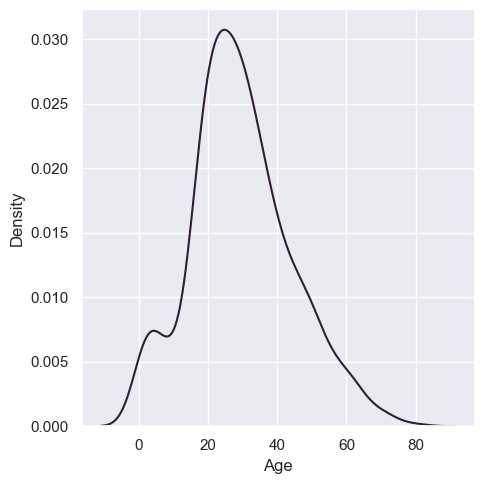

In [9]:
plt.figure(figsize=(5, 5))
sns.displot(x="Age", kind="kde", data=df)


In [10]:
df["Age"].fillna(df["Age"].median(), inplace=True)


In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


### Meaningless Variables


In [12]:
df["Ticket"].value_counts()


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
df["Cabin"].value_counts()


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
df.drop(["Ticket", "Cabin"], axis=1, inplace=True)


### Correlations


In [15]:
num_cols = df[["Age", "SibSp", "Fare", "Parch"]]
corr = num_cols.corr()
corr


,Age,SibSp,Fare,Parch
Age,1.000000,-0.233296,0.096688,-0.172482
SibSp,-0.233296,1.000000,0.159651,0.414838
Fare,0.096688,0.159651,1.000000,0.216225
Parch,-0.172482,0.414838,0.216225,1.000000


<AxesSubplot:>

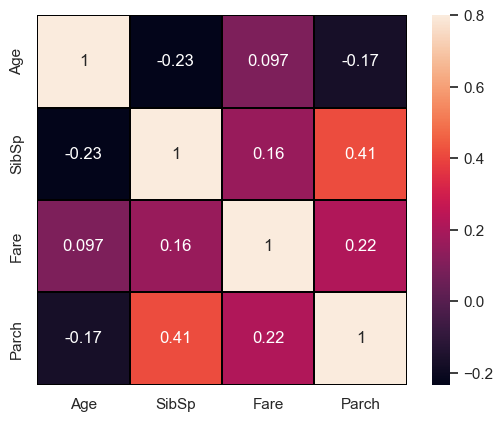

In [16]:
sns.heatmap(corr, vmax=.8, linewidths=0.05,
            square=True, annot=True, linecolor="black")


In [17]:
cat_cols = df[["Survived", "Pclass", "Sex", "Embarked"]]


## Encoding


In [18]:
cat_cols = pd.get_dummies(cat_cols, columns=["Embarked"], prefix=["Embarked"])


In [19]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()

cat_cols["Sex"] = lbe.fit_transform(cat_cols["Sex"])


In [20]:
map_new = {3: 1, 1: 3, 2: 2}
cat_cols["Pclass"] = cat_cols["Pclass"].map(map_new)


In [35]:
df = pd.concat([num_cols, cat_cols], axis=1)

df.head()


,Age,SibSp,Fare,Parch,Survived,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,0,1,1,0,0,1
1,38.0,1,71.2833,0,1,3,0,1,0,0
2,26.0,0,7.9250,0,1,1,0,0,0,1
3,35.0,1,53.1000,0,1,3,0,0,0,1
4,35.0,0,8.0500,0,0,1,1,0,0,1


## ML Modelling


In [36]:
from sklearn.model_selection import train_test_split
y = df["Survived"]
X = df.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=21)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep="\n")


(712, 9)
(712,)
(179, 9)
(179,)


### Logistic Regression Model

Train Score: 0.8047752809
Train Confusion Matrix:
[[384  60]
 [ 79 189]]
Train Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       444
           1       0.76      0.71      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712

Test Score: 0.8044692737
Test Confusion Matrix:
[[93 12]
 [23 51]]
Test Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



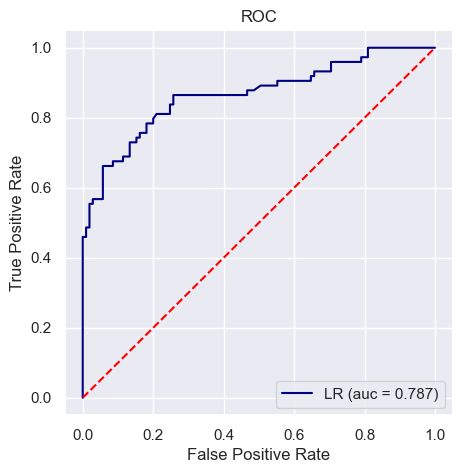

In [97]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

lr_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)
lr_pred = lr_model.predict(X_train)
lr_score = accuracy_score(y_train, lr_pred)
lr_test_pred = lr_model.predict(X_test)
lr_test_score = accuracy_score(y_test, lr_test_pred)

print(f"Train Score: {lr_score:0.10f}",
      f"Train Confusion Matrix:\n{confusion_matrix(y_train, lr_pred)}",
      f"Train Report:\n{classification_report(y_train, lr_pred)}", sep="\n")

print(f"Test Score: {lr_test_score:0.10f}",
      f"Test Confusion Matrix:\n{confusion_matrix(y_test, lr_test_pred)}",
      f"Test Report:\n{classification_report(y_test, lr_test_pred)}", sep="\n")

plt.figure(figsize=(5, 5))
roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(
    y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='LR (auc = %0.3f)' %
         roc_auc, color='navy'), plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC'), plt.xlabel('False Positive Rate'), plt.ylabel(
    'True Positive Rate'), plt.legend(loc="lower right")
plt.show()


In [98]:
from sklearn.model_selection import cross_val_score

print("Train Cross Validation Array: ", cross_val_score(lr_model, X_train,y_train,cv=5))
print("Train Cross Validation Score: ", cross_val_score(lr_model, X_train,y_train,cv=5).mean())

print("Test Cross Validation Array: ", cross_val_score(lr_model, X_test,y_test,cv=5))
print("Test Cross Validation Score: ", cross_val_score(lr_model, X_test,y_test,cv=5).mean())

Train Cross Validation Array:  [0.8041958  0.79020979 0.83802817 0.77464789 0.77464789]
Train Cross Validation Score:  0.7963459076135132
Test Cross Validation Array:  [0.75       0.83333333 0.66666667 0.72222222 0.88571429]
Test Cross Validation Score:  0.7715873015873016


In [99]:
print("Prelive Model Cross Validation Score: ", cross_val_score(lr_model,X,y,cv=10).mean())

Prelive Model Cross Validation Score:  0.7946192259675406


### Naive Bayes Model

Train Score: 0.7851123596
Train Confusion Matrix:
[[366  78]
 [ 75 193]]
Train Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       444
           1       0.71      0.72      0.72       268

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

Test Score: 0.8156424581
Test Confusion Matrix:
[[91 14]
 [19 55]]
Test Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



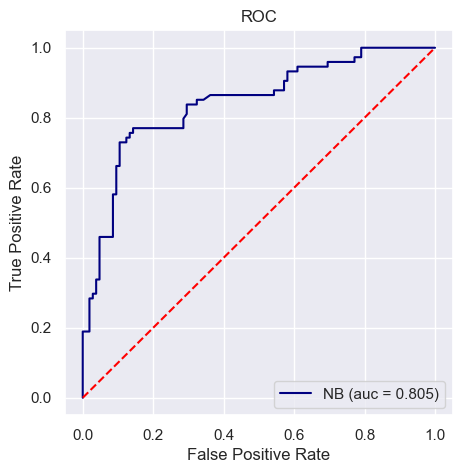

In [94]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

nb_model = GaussianNB().fit(X_train, y_train)
nb_pred = nb_model.predict(X_train)
nb_score = accuracy_score(y_train, nb_pred)
nb_test_pred = nb_model.predict(X_test)
nb_test_score = accuracy_score(y_test, nb_test_pred)

print(f"Train Score: {nb_score:0.10f}",
      f"Train Confusion Matrix:\n{confusion_matrix(y_train, nb_pred)}",
      f"Train Report:\n{classification_report(y_train, nb_pred)}", sep="\n")

print(f"Test Score: {nb_test_score:0.10f}",
      f"Test Confusion Matrix:\n{confusion_matrix(y_test, nb_test_pred)}",
      f"Test Report:\n{classification_report(y_test, nb_test_pred)}", sep="\n")

plt.figure(figsize=(5, 5))
roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(
    y_test, nb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='NB (auc = %0.3f)' %
         roc_auc, color='navy'), plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC'), plt.xlabel('False Positive Rate'), plt.ylabel(
    'True Positive Rate'), plt.legend(loc="lower right")
plt.show()


In [95]:
from sklearn.model_selection import cross_val_score

print("Train Cross Validation Array: ", cross_val_score(nb_model, X_train,y_train,cv=5))
print("Train Cross Validation Score: ", cross_val_score(nb_model, X_train,y_train,cv=5).mean())

print("Test Cross Validation Array: ", cross_val_score(nb_model, X_test,y_test,cv=5))
print("Test Cross Validation Score: ", cross_val_score(nb_model, X_test,y_test,cv=5).mean())

Train Cross Validation Array:  [0.81118881 0.76923077 0.80985915 0.73943662 0.74647887]
Train Cross Validation Score:  0.7752388456613809
Test Cross Validation Array:  [0.77777778 0.80555556 0.69444444 0.75       0.8       ]
Test Cross Validation Score:  0.7655555555555555


In [96]:
print("Prelive Model Cross Validation Score: ", cross_val_score(nb_model,X,y,cv=10).mean())

Prelive Model Cross Validation Score:  0.7845443196004993


### KNN Model

Train Score: 0.7640449438
Train Confusion Matrix:
[[399  45]
 [123 145]]
Train Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       444
           1       0.76      0.54      0.63       268

    accuracy                           0.76       712
   macro avg       0.76      0.72      0.73       712
weighted avg       0.76      0.76      0.75       712

Test Score: 0.6983240223
Test Confusion Matrix:
[[92 13]
 [41 33]]
Test Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       105
           1       0.72      0.45      0.55        74

    accuracy                           0.70       179
   macro avg       0.70      0.66      0.66       179
weighted avg       0.70      0.70      0.68       179



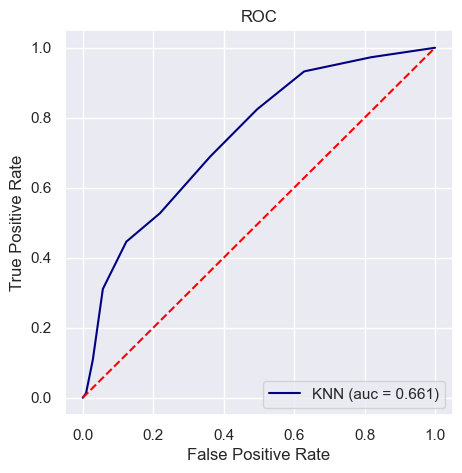

In [90]:
# K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

knn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
knn_pred = knn_model.predict(X_train)
knn_score = accuracy_score(y_train, knn_pred)
knn_test_pred = knn_model.predict(X_test)
knn_test_score = accuracy_score(y_test, knn_test_pred)

print(f"Train Score: {knn_score:0.10f}",
      f"Train Confusion Matrix:\n{confusion_matrix(y_train, knn_pred)}",
      f"Train Report:\n{classification_report(y_train, knn_pred)}", sep="\n")

print(f"Test Score: {knn_test_score:0.10f}",
      f"Test Confusion Matrix:\n{confusion_matrix(y_test, knn_test_pred)}",
      f"Test Report:\n{classification_report(y_test, knn_test_pred)}", sep="\n")

plt.figure(figsize=(5, 5))
roc_auc = roc_auc_score(y_test, knn_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(
    y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='KNN (auc = %0.3f)' %
         roc_auc, color='navy'), plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC'), plt.xlabel('False Positive Rate'), plt.ylabel(
    'True Positive Rate'), plt.legend(loc="lower right")
plt.show()


In [91]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": np.arange(1, 30)}
knn_cv = GridSearchCV(knn_model, knn_params, cv=5).fit(X_train, y_train)
print(knn_cv.best_params_)


{'n_neighbors': 10}


In [92]:
from sklearn.model_selection import cross_val_score

print("Train Cross Validation Array: ", cross_val_score(knn_model, X_train,y_train,cv=5))
print("Train Cross Validation Score: ", cross_val_score(knn_model, X_train,y_train,cv=5).mean())

print("Test Cross Validation Array: ", cross_val_score(knn_model, X_test,y_test,cv=5))
print("Test Cross Validation Score: ", cross_val_score(knn_model, X_test,y_test,cv=5).mean())

Train Cross Validation Array:  [0.75524476 0.68531469 0.72535211 0.77464789 0.72535211]
Train Cross Validation Score:  0.7331823106470994
Test Cross Validation Array:  [0.58333333 0.61111111 0.63888889 0.61111111 0.62857143]
Test Cross Validation Score:  0.6146031746031746


In [93]:
print("Prelive Model Cross Validation Score: ", cross_val_score(knn_model,X,y,cv=10).mean())

Prelive Model Cross Validation Score:  0.6970287141073659


### SVM Model

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

svm_model = SVC(kernel="linear",C = 1).fit(X_train, y_train)
svm_pred = svm_model.predict(X_train)
svm_score = accuracy_score(y_train, svm_pred)
svm_test_pred = svm_model.predict(X_test)
svm_test_score = accuracy_score(y_test, svm_test_pred)

print(f"Train Score: {svm_score:0.10f}",
      f"Train Confusion Matrix:\n{confusion_matrix(y_train, svm_pred)}",
      f"Train Report:\n{classification_report(y_train, svm_pred)}", sep="\n")

print(f"Test Score: {svm_test_score:0.10f}",
      f"Test Confusion Matrix:\n{confusion_matrix(y_test, svm_test_pred)}",
      f"Test Report:\n{classification_report(y_test, svm_test_pred)}", sep="\n")


Train Score: 0.7879213483
Train Confusion Matrix:
[[379  65]
 [ 86 182]]
Train Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

Test Score: 0.7821229050
Test Confusion Matrix:
[[89 16]
 [23 51]]
Test Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [87]:
% % time
svc_params = {"C": np.arange(1, 5)}
svm_cv = GridSearchCV(svm_model, svc_params, cv=5,
                      n_jobs=-1, verbose=2).fit(X_train, y_train)
print("Best Parameter: " + str(svm_cv.best_params_))
print("Best Score: " + str(svm_cv.best_score_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
En iyi skor: 0.7879444499162809
En iyi parametre: {'C': 1}
CPU times: total: 8.45 s
Wall time: 1min 9s
